# Final Project for DTSA-5511


## Introduction and Problem Description

Welcome to my final project for DTSA-5509, for this project I wanted to gain some experience with using computer vision. During our programming assignments we worked with image data, I got chance to import and clean the data. The dataset Flowers Recognition can be downloaded from[kaggle](https://www.kaggle.com/datasets/alxmamaev/flowers-recognition?resource=download) and contains labeled 4242 images of flowers. It found a reasonably standard image dataset containing 5 files, each directory exclusively containing images of a specific class of flower. The dataset is divided into five classes: 

1. dandelion

2. daisy

3. sunflower

4. tulip

5. rose

I will mainly use supervised deep learning methods in this project and gain some experience with using computer vision. I will apply 3 different models, and compare the results to find which model is more suitable and effective to this dataset.

1. MobileNetV3

2. RestNet50

3. 3 layers convolution model




In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Exploratory Data Analysis (EDA)



Here are the categories of flowers we want to classify

In [ ]:
categories=['dandelion', 'daisy', 'sunflower', 'tulip', 'rose']

# Target Directory
directory = "drive/MyDrive/flowers"


Loading data and resize it to (150, 150) dimension, and organize it with its corresponding labels

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
features=[]
for i in categories:
    path=os.path.join(directory,i)
    num_classes=categories.index(i)
    for img in os.listdir(path):
        if img.endswith('.jpg'):
            
            img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_COLOR)
            img_array=cv2.resize(img_array,(150,150))
            features.append([img_array,num_classes])

Separate features and labels

In [ ]:
X=[]
y=[]
for i,j in features:
    X.append(i)
    y.append(j)

Randomly pick 10 images to visualize

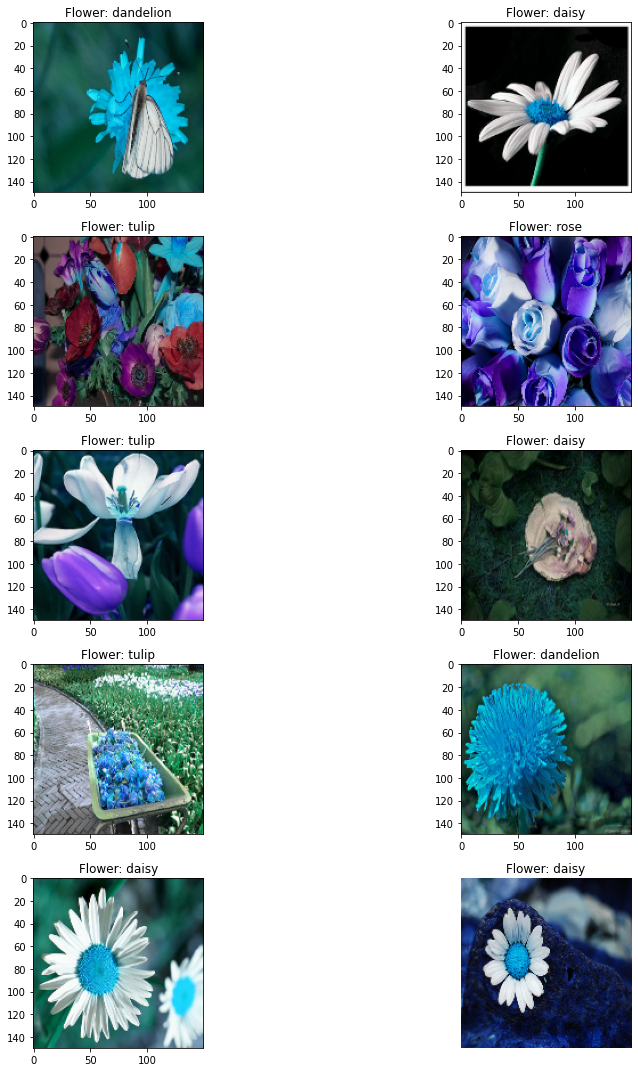

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (2):
        l=np.random.randint(0,len(y))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title('Flower: '+categories[y[l]])
plt.axis('off')        
plt.tight_layout()

In [ ]:
X=np.array(X).reshape(-1,150,150,3)/255.0

**5** class labels distribution

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


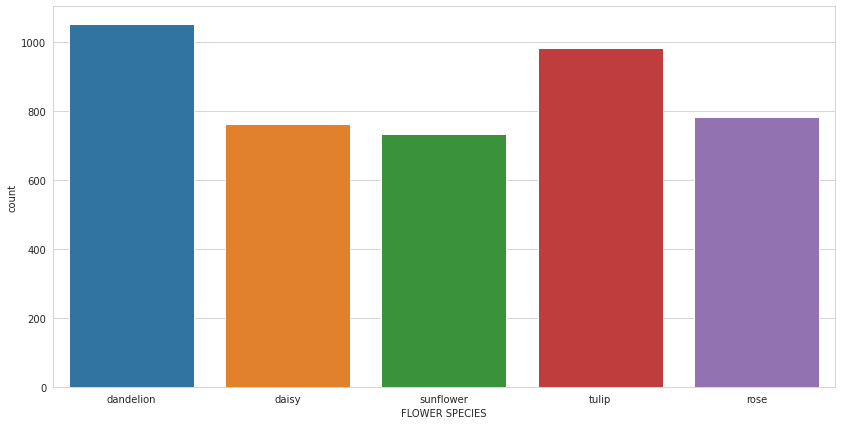

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(14,7))
fig=sns.countplot(y)
fig.set(xticks=range(len(categories)), xticklabels=[i for i in categories])
plt.xlabel('FLOWER SPECIES')
plt.show()

In [ ]:
list_dandelion=len([i for i in y if i==0])
list_daisy=len([i for i in y if i==1])
list_sunflower=len([i for i in y if i==2])
list_tulip=len([ i for i in y if i==3])
list_rose=len([i for i in y if i==4])

list_species=[list_dandelion,list_daisy,list_sunflower,list_tulip,list_rose]

Another pie chart distribution

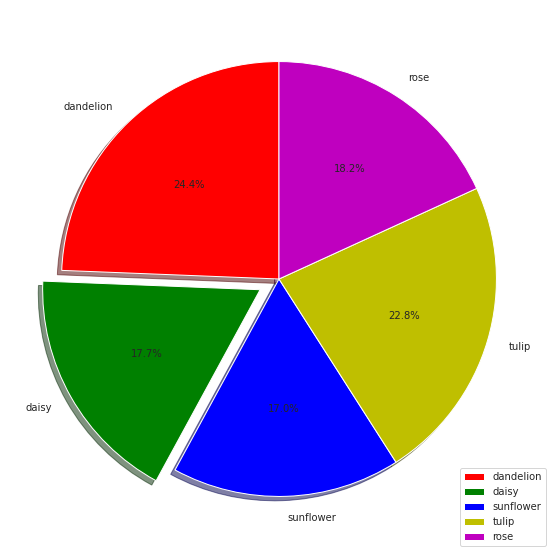

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(18,10))
plt.pie(list_species,labels=categories,startangle=90,colors=['r','g','b','y','m'],autopct='%1.1f%%',explode = (0, 0.1, 0, 0,0),shadow=True)
plt.legend()
plt.show()

## Model building and Comparison

In [ ]:
from tensorflow.keras.utils import to_categorical
y=to_categorical(y)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val=train_test_split(X,y,test_size=0.2,random_state=12)

In [ ]:
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical

# specifically for cnn
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization, MaxPool2D
 
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

#### Compare 3 models in 15 epochs

In [ ]:
epochs=15

from keras.callbacks import ReduceLROnPlateau
red_lr= ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.1)

#### image augmentation and randomization

In [ ]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(x_train)

#### Model 1:  Three layer convolution model

In [ ]:
model_1 = Sequential([
    Conv2D(filters=32, kernel_size=4, padding='same', activation='relu',input_shape=(150,150,3)),
    MaxPool2D(2,2),
    Conv2D(filters=64, kernel_size=4, padding='same', activation='relu'),
    MaxPool2D(2,2), 
    Conv2D(filters=64, kernel_size=4, padding='same', activation='relu'),
    MaxPool2D(2,2),
    Dropout(0.5),
    Flatten(),
    Dense(5, activation='softmax')
])

In [ ]:
model_1.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:


history_1 = model_1.fit_generator(datagen.flow(x_train,y_train, batch_size=128),
                              epochs = epochs, validation_data = (x_val,y_val),
                              verbose = 1, steps_per_epoch=x_train.shape[0] // 128)

<ipython-input-15-9648d895c290>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history_1 = model_1.fit_generator(datagen.flow(x_train,y_train, batch_size=128),


Epoch 1/15
26/26 [==============================] - 19s 720ms/step - loss: 0.7777 - accuracy: 0.6953 - val_loss: 0.8396 - val_accuracy: 0.7118
Epoch 2/15
26/26 [==============================] - 22s 841ms/step - loss: 0.7629 - accuracy: 0.7188 - val_loss: 0.7364 - val_accuracy: 0.7384
Epoch 3/15
26/26 [==============================] - 18s 688ms/step - loss: 0.7426 - accuracy: 0.7194 - val_loss: 0.7986 - val_accuracy: 0.7280
Epoch 4/15
26/26 [==============================] - 18s 700ms/step - loss: 0.7419 - accuracy: 0.7194 - val_loss: 0.7463 - val_accuracy: 0.7350
Epoch 5/15
26/26 [==============================] - 18s 689ms/step - loss: 0.7315 - accuracy: 0.7185 - val_loss: 0.7791 - val_accuracy: 0.7292
Epoch 6/15
26/26 [==============================] - 18s 699ms/step - loss: 0.7304 - accuracy: 0.7362 - val_loss: 0.7270 - val_accuracy: 0.7396
Epoch 7/15
26/26 [==============================] - 18s 692ms/step - loss: 0.7151 - accuracy: 0.7293 - val_loss: 0.7592 - val_accuracy: 0.7465

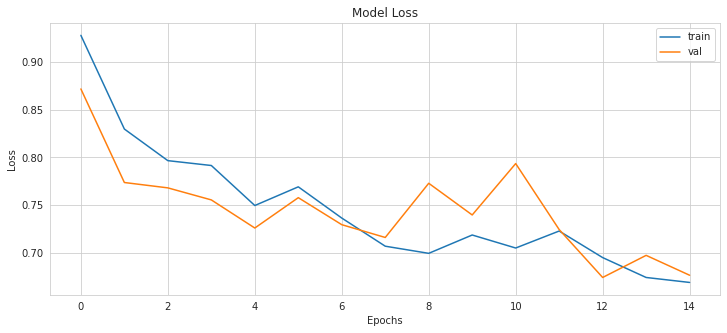

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,5))
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])
plt.show()

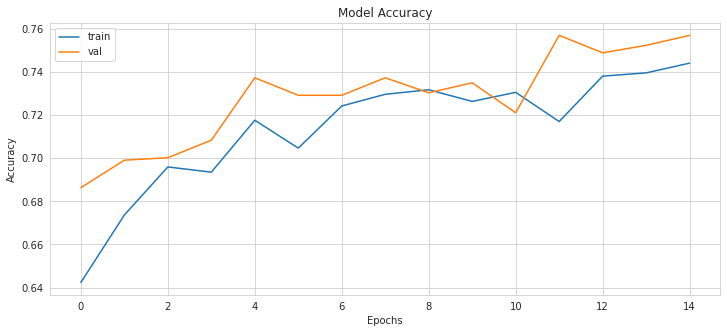

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,5))
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])
plt.show()

#### Model 2: MobileNetV3

In [ ]:
model_2 = tf.keras.applications.MobileNetV3Small(
    input_shape=(150,150,3),
    alpha=1.0,
    minimalistic=False,
    include_top=True,
    weights=None,
    input_tensor=None,
    classes=5,
    pooling=None,
    dropout_rate=0.2,
    classifier_activation="softmax",
    include_preprocessing=True,
)

In [ ]:
model_2.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

history_2 = model_2.fit_generator(datagen.flow(x_train,y_train, batch_size=128),
                              epochs = epochs, validation_data = (x_val,y_val),
                              verbose = 1, steps_per_epoch=x_train.shape[0] // 128)

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
<ipython-input-28-0caa82c3c8bd>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history_2 = model_2.fit_generator(datagen.flow(x_train,y_train, batch_size=128),


Epoch 1/15
26/26 [==============================] - 28s 806ms/step - loss: 1.2982 - accuracy: 0.4553 - val_loss: 1.6111 - val_accuracy: 0.1667
Epoch 2/15
26/26 [==============================] - 19s 714ms/step - loss: 1.1311 - accuracy: 0.5585 - val_loss: 1.6109 - val_accuracy: 0.1667
Epoch 3/15
26/26 [==============================] - 18s 700ms/step - loss: 1.0424 - accuracy: 0.6000 - val_loss: 1.6108 - val_accuracy: 0.1667
Epoch 4/15
26/26 [==============================] - 18s 704ms/step - loss: 1.0068 - accuracy: 0.6078 - val_loss: 1.6104 - val_accuracy: 0.1667
Epoch 5/15
26/26 [==============================] - 18s 707ms/step - loss: 0.9467 - accuracy: 0.6325 - val_loss: 1.6114 - val_accuracy: 0.1667
Epoch 6/15
26/26 [==============================] - 18s 707ms/step - loss: 0.9171 - accuracy: 0.6403 - val_loss: 1.6096 - val_accuracy: 0.1667
Epoch 7/15
26/26 [==============================] - 18s 702ms/step - loss: 0.8949 - accuracy: 0.6580 - val_loss: 1.6076 - val_accuracy: 0.2315

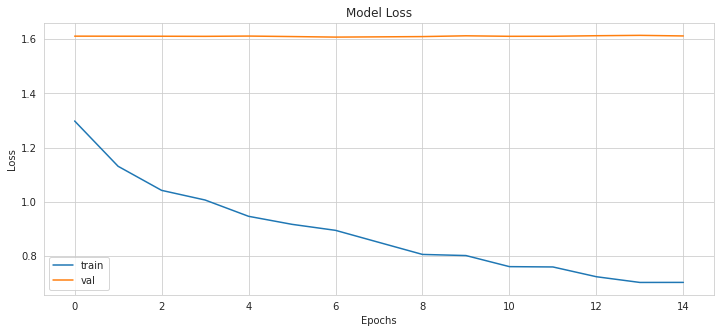

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,5))
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])
plt.show()

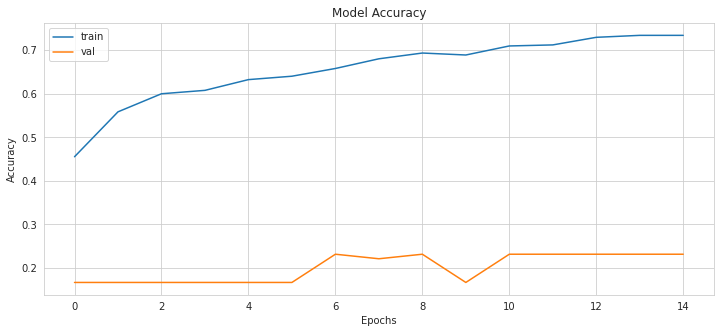

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,5))
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])
plt.show()

#### Model 3: ResNet50

In [ ]:
model_3 = tf.keras.applications.ResNet50(
    include_top=True,
    weights=None,
    input_tensor=None,
    input_shape=(150,150,3),
    pooling=None,
    classes=5
)

In [ ]:
model_3.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

history_3 = model_3.fit_generator(datagen.flow(x_train,y_train, batch_size=128),
                              epochs = epochs, validation_data = (x_val,y_val),
                              verbose = 1, steps_per_epoch=x_train.shape[0] // 128)

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
<ipython-input-14-2449b9e50cbf>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history_3 = model_3.fit_generator(datagen.flow(x_train,y_train, batch_size=128),


Epoch 1/15
26/26 [==============================] - 49s 1s/step - loss: 2.2529 - accuracy: 0.3913 - val_loss: 10.6520 - val_accuracy: 0.2315
Epoch 2/15
26/26 [==============================] - 26s 992ms/step - loss: 1.2568 - accuracy: 0.5215 - val_loss: 2.4237 - val_accuracy: 0.2315
Epoch 3/15
26/26 [==============================] - 25s 937ms/step - loss: 1.0345 - accuracy: 0.6016 - val_loss: 2.2549 - val_accuracy: 0.2315
Epoch 4/15
26/26 [==============================] - 26s 989ms/step - loss: 0.9894 - accuracy: 0.6174 - val_loss: 2.1949 - val_accuracy: 0.2315
Epoch 5/15
26/26 [==============================] - 26s 983ms/step - loss: 0.9350 - accuracy: 0.6469 - val_loss: 1.9838 - val_accuracy: 0.2037
Epoch 6/15
26/26 [==============================] - 26s 980ms/step - loss: 0.9003 - accuracy: 0.6608 - val_loss: 2.3162 - val_accuracy: 0.2315
Epoch 7/15
26/26 [==============================] - 25s 934ms/step - loss: 0.8039 - accuracy: 0.7050 - val_loss: 2.4399 - val_accuracy: 0.2176
E

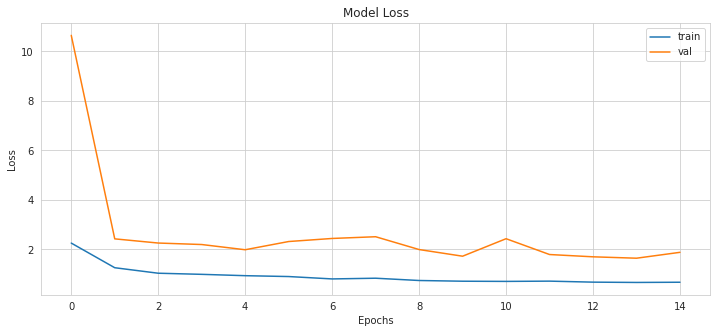

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,5))
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])
plt.show()

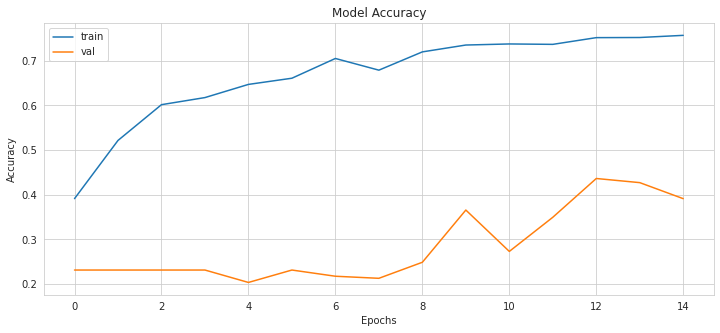

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,5))
plt.plot(history_3.history['accuracy'])
plt.plot(history_3.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])
plt.show()

Comparing the 3 models, we will see both ResNet50 and MobileNetV3 has some overfitting issue (ResNet50 is a little better). So we will choose the three layer convolution model for the final result analysis.

# Analysis and Results

In [ ]:
preds=model_1.predict(x_val)

27/27 [==============================] - 0s 14ms/step


In [ ]:
predictions=np.argmax(preds,axis=1)

In [ ]:
ground_truth = np.argmax(y_val, axis=1)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

classification_metrics = classification_report(ground_truth, predictions, target_names=categories )
print(classification_metrics)

              precision    recall  f1-score   support

   dandelion       0.76      0.80      0.78       200
       daisy       0.86      0.65      0.74       144
   sunflower       0.77      0.81      0.79       161
       tulip       0.68      0.81      0.74       191
        rose       0.72      0.63      0.67       168

    accuracy                           0.74       864
   macro avg       0.76      0.74      0.74       864
weighted avg       0.75      0.74      0.74       864



In [ ]:
correct_class=[]
incorrect_class=[]

for i in range(0,len(preds)):
    if( ground_truth[i] == predictions[i] ):
        correct_class.append(i)
    if(len(correct_class)==8):
        break

for i in range(0,len(preds)):
    if(ground_truth[i] != predictions[i]):
        incorrect_class.append(i)
    if(len(incorrect_class)==8):
        break

## Correct Predictions

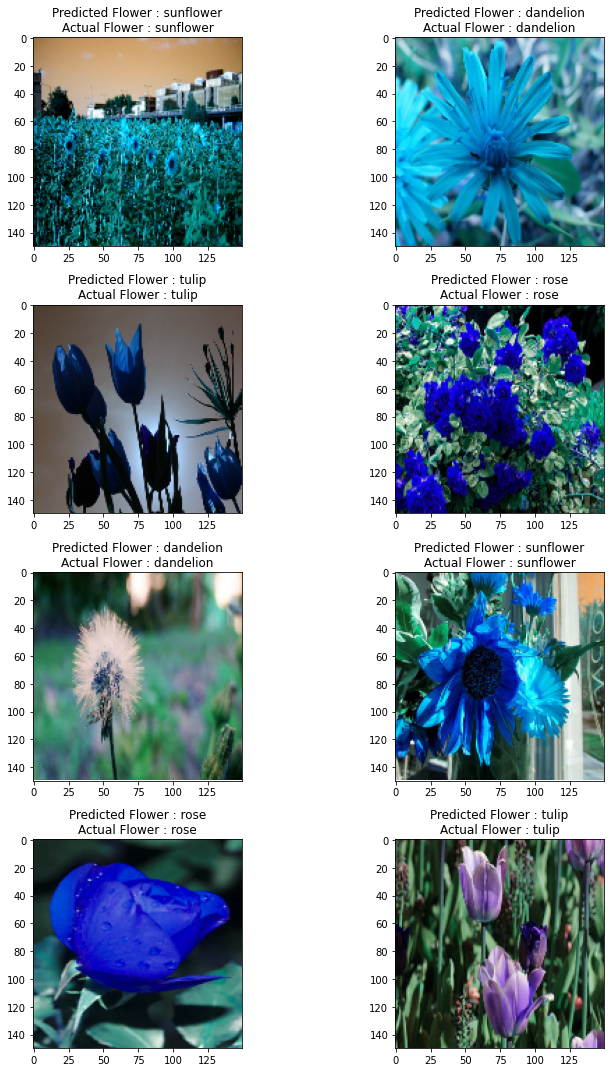

In [ ]:
count=0
fig,ax=plt.subplots(4,2)
fig.set_size_inches(15,15)
for i in range (4):
    for j in range (2):
        ax[i,j].imshow(x_val[correct_class[count]])
        ax[i,j].set_title("Predicted Flower : "+ categories[predictions[correct_class[count]]] +"\n"+"Actual Flower : "+ categories[ground_truth[correct_class[count]]])
        plt.tight_layout()
        count+=1

## Wrong Predictions

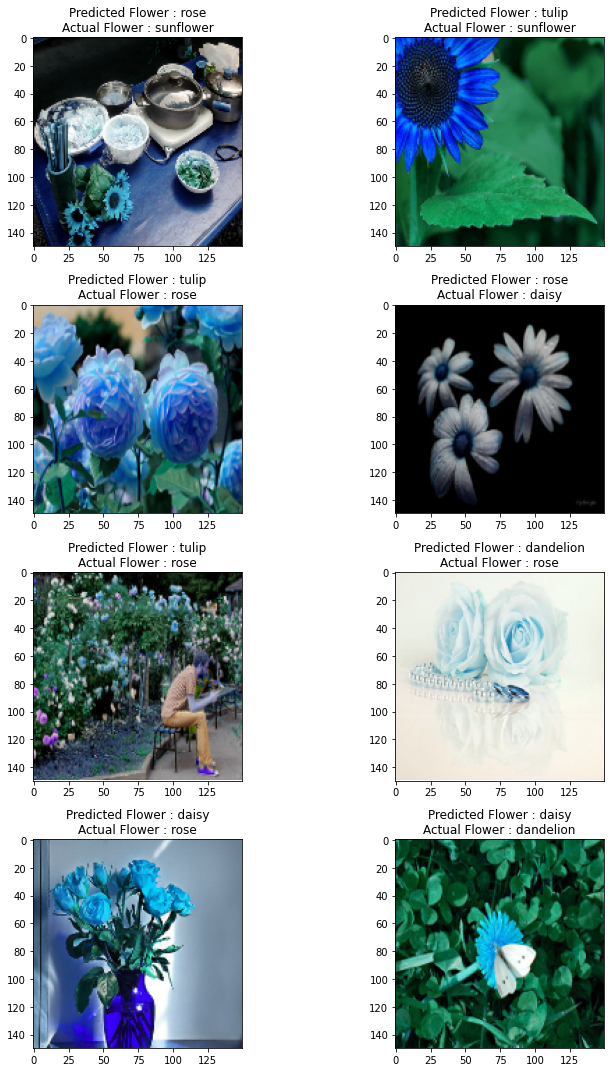

In [ ]:
count=0
fig,ax=plt.subplots(4,2)
fig.set_size_inches(15,15)
for i in range (4):
    for j in range (2):
        ax[i,j].imshow(x_val[incorrect_class[count]])
        ax[i,j].set_title("Predicted Flower : "+ categories[predictions[incorrect_class[count]]] +"\n"+"Actual Flower : "+ categories[ground_truth[incorrect_class[count]]])
        plt.tight_layout()
        count+=1

## Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools
cm= confusion_matrix(ground_truth, predictions)

In [ ]:
#To get better visual of the confusion matrix:
def plot_confusion_matrix(cm, classes,
             normalize=False,
             title='Confusion matrix',
             cmap=plt.cm.Blues):
    #Add Normalization Option
    '''prints pretty confusion metric with normalization option '''
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    
#     print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


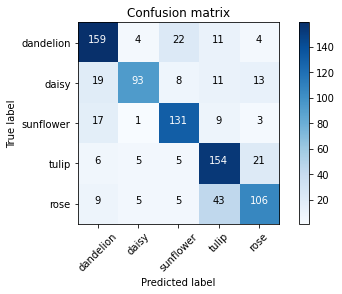

In [ ]:
plot_confusion_matrix(cm, categories)

# Conclusion


For this project I want to try to handle image data and gain experience with using computer vision libraries. In terms of the models constructed, I comparing all these 3 models. The three layer convolution model performed much better, both in computation time and in accuracy. Both ResNet50 and MobileNetV3 has some overfitting issue (ResNet50 is a little better), only the three layer convolution model works well in this project. This data of Flowers Recognition was quite clean, next time I'd like to use some messier data for practicing cleaning image dataset. In the future, beside this project, I would like to use the edge analysis methods for model construction.


